In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

In [28]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/Data',
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    subset = 'training'
)

Found 110 images belonging to 2 classes.


In [29]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/Data',
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    subset = 'validation'
)

Found 27 images belonging to 2 classes.


In [30]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_generator, epochs = 8, validation_data = val_generator, batch_size = BATCH_SIZE)

Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5489 - loss: 1.2068 - val_accuracy: 1.0000 - val_loss: 0.3954
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9895 - loss: 0.2987 - val_accuracy: 1.0000 - val_loss: 0.0685
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 0.0261 - val_accuracy: 0.9630 - val_loss: 0.0409
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 6/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 6.6889e-04 - val_accuracy: 0.9630 - val_loss: 0.1268
Epoch 7/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 1.9718e-05 - val_accuracy: 1.0000 - val_loss: 3.9219e-04
Epoch 8/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 4.8749e-06 - val_accuracy: 1.0000 - val_loss: 4.3840e

In [33]:
model.save('/content/drive/MyDrive/archive (1)/PlantDiseaseDetect.h5')

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/archive (1)/PlantDiseaseDetect.h5')

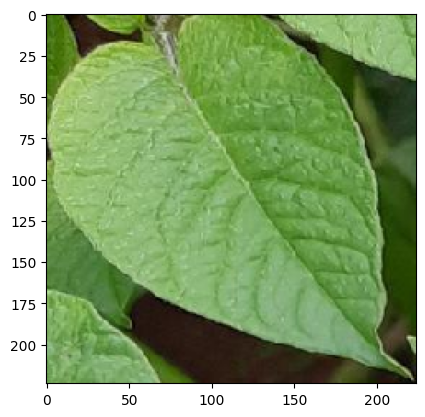

In [35]:
test_image_path = "/content/Healthy (5).jpg"
img = image.load_img(test_image_path, target_size = (224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [36]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array /= 255.

In [37]:
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[2.7019007e-06]]


In [38]:
if prediction >= 0.5:
  print("Leaf is unhealthy")
else:
  print("leaf is healthy")

leaf is healthy


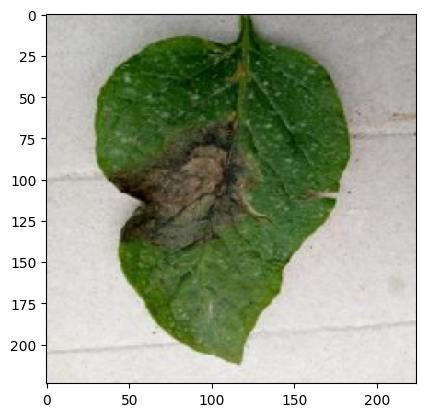

In [43]:
test_image_path = "/content/Late_Blight (473).jpg"
img = image.load_img(test_image_path, target_size = (224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [44]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array /= 255.

In [45]:
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[1.]]


In [47]:
if prediction >= 0.5:
  print("Leaf is Diseased")
else:
  print("leaf is healthy")

Leaf is Diseased
